## Oppstart

### Preamble

Contains imports and some utility code.

In [1]:
from dhlab.module_update import update, css, code_toggle

In [2]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
import networkx as nx
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
css()

In [5]:
def frame_sort(frame, by=0):
    return frame.sort_values(by=by, ascending=False)

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Kollokasjoner eller assosiasjoner

Hvilke ord opptrer et ord sammen med innenfor et korpus? 

### Define a corpus

Bruk gjerne Dewey eller temaord for å definere korpuset, hold det forholdsvis lite rundt 200 bøker.

In [7]:
collword = 'demokrati'

In [8]:
korpus = nb.book_urn(words=[collword], ddk='8%', period=(1960, 2020), limit=500)
len(korpus)

500


Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.



In [9]:
nb.frame(korpus).head(10)

,0,1,2,3
0,2007110601058,,Godt sagt,1992
1,2014101408117,"Bringsværd, Tor Åge",Karavane,1974
2,2011051920009,"Solstad, Dag",Gymnaslærer Pedersens beretning om den store p...,2006
3,2015030606064,,Mannen og verket,1996
4,2007100104016,"Nag, Martin",Steingjerde,1991
5,2007062900070,"Eggen, Arnljot",Dikt gjennom 30 år,1979
6,2013110508446,"Marklund, Liza",Prime time,2006
7,2013100105034,"Moore, Christopher",Møkkajobb,2008
8,2014041406097,"Kostova, Elizabeth",Svanetyvene,2011
9,2014030306054,"McCarthy, Cormac",Grensetrilogien,2006


In [10]:
nb.urn_concordance(word=collword, urns=korpus)

"Godt sagt, , 1992",Det sanne,demokrati,er det som tillater hvert
"Karavane, Bringsværd, Tor Åge, 1974",årsmelding og gir skinn av,demokrati,. Men det er forbudt
"Gymnaslærer Pedersens beretning om den store politiske vekkelsen som har hjemsøkt vårt land, Solstad, Dag, 2006","å fortsette diskusjonen derfrå ,",demokrati,"eller ikke-demokrati , autoritær eller"
"Gymnaslærer Pedersens beretning om den store politiske vekkelsen som har hjemsøkt vårt land, Solstad, Dag, 2006",i et såpass åpenlyst formelt,demokrati,"som det norske , men"
"Gymnaslærer Pedersens beretning om den store politiske vekkelsen som har hjemsøkt vårt land, Solstad, Dag, 2006",at marxismen-leninismen var uforenlig med,demokrati,. Sjøl om ledelsen i
"Gymnaslærer Pedersens beretning om den store politiske vekkelsen som har hjemsøkt vårt land, Solstad, Dag, 2006",iallfall i den mening av,demokrati,som betyr noe for folk
"Mannen og verket, , 1996",politisk faktor i eit nytt,demokrati,None
"Mannen og verket, , 1996",eit opplyst og vidsynt nasjonalt,demokrati,". """
"Steingjerde, Nag, Martin, 1991",i ord — — og,demokrati,"... Du , — modell"
"Steingjerde, Nag, Martin, 1991","! . . Å ,",demokrati,... Et eventyr for voksne
"Steingjerde, Nag, Martin, 1991",AV TID . Hva «,demokrati,» er ? . .


## Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

Så kan vi hente ut selve kollokasjonen,dvs. ord som står innenfor en viss avstand fra målordet.

In [11]:
small_window = 5
large_window = 10

In [12]:
def collpart(collword, urns, win = 5, limit = 10000):
    return nb.urn_coll(collword, urns = korpus, after = win, before = win, limit = 10000)

Kollokasjonen er en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [13]:
small = collpart(collword, nb.pure_urn(korpus), win = 5)
large = collpart(collword, nb.pure_urn(korpus), win = 10)



## Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(small)
nb.normalize_corpus_dataframe(large)

Inspiser dataene etter normalisering

### Kollokasjonen

In [14]:
small.head()

,0
",",625
.,588
og,431
i,300
et,265


In [15]:
large.head()

,0
",",1115
.,1072
og,709
i,527
det,439


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [16]:
delta = pd.DataFrame()

In [17]:
delta['small'] = small[0]
delta['large'] = large[0]

In [18]:
delta['ratio'] = small[0]/large[0]

In [19]:
#delta['log'] = np.log(delta['ratio'])

In [20]:
#delta['score'] = delta['ratio'] * delta['log']

In [21]:
delta[(delta['small'] > 2) & (delta['ratio'] > 0.6)].sort_values(by='ratio', ascending=False)

,small,large,ratio
folkets,3,3,1.000000
tilhenger,5,5,1.000000
talte,3,3,1.000000
begrepet,3,3,1.000000
rettigheter,6,6,1.000000
...,...,...,...
Vi,23,37,0.621622
ting,8,13,0.615385
tror,11,18,0.611111
;,22,36,0.611111


In [22]:
delta.loc[[',','.','og','!', '?']]

,small,large,ratio
",",625,1115,0.560538
.,588,1072,0.548507
og,431,709,0.607898
!,29,63,0.460317
?,75,126,0.595238


In [23]:
delta_max = delta[delta.small < delta.large][delta.small > 0][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [24]:
delta_const = delta[delta.small > 2][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [25]:
delta_max.head(20)

,small,large,ratio
Litterært,17,18,0.944444
Norden,16,17,0.941176
sosialisme,13,14,0.928571
Et,20,22,0.909091
fascisme,10,11,0.909091
Om,7,8,0.875000
økonomisk,7,8,0.875000
Alt,7,8,0.875000
rettferdighet,14,16,0.875000
innføre,7,8,0.875000


In [26]:
delta_const

,small,large,ratio
folkets,3,3,1.000000
tilhenger,5,5,1.000000
talte,3,3,1.000000
begrepet,3,3,1.000000
rettigheter,6,6,1.000000
...,...,...,...
Vi,23,37,0.621622
ting,8,13,0.615385
tror,11,18,0.611111
;,22,36,0.611111


In [27]:
delta_max.head(50).index

Index(['Litterært', 'Norden', 'sosialisme', 'Et', 'fascisme', 'Om',
       'økonomisk', 'Alt', 'rettferdighet', 'innføre', 'vårt', 'eit', 'nytt',
       'form', 'Hva', 'Ikke', 'leve', 'ytringsfrihet', 'Er', 'liberale',
       'revolusjon', 'norsk', 'Dere', 'største', 'likhet', 'betyr', '"', 'Ja',
       'dets', 'politikken', 'stemmerett', 'proletariske', 'USA', 'Slik',
       'fungerer', 'likestilling', 'perfekt', 'styreform', 'fungere', 'et',
       'kampen', 'unge', 'sant', 'vel', 'alltid', 'moderne', 'frihet',
       'enhver', 'følte', 'fått'],
      dtype='object')

In [31]:
delta_const.head(150).index

Index(['folkets', 'tilhenger', 'talte', 'begrepet', 'rettigheter', 'aller',
       'språk', 'slutt', '14', 'Vårt',
       ...
       'lov', 'kor', 'kjempe', 'likevel', '5', 'Arne', 'liberalisme', 'no',
       'foredrag', 'samfunnsforskning'],
      dtype='object', length=150)

# Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

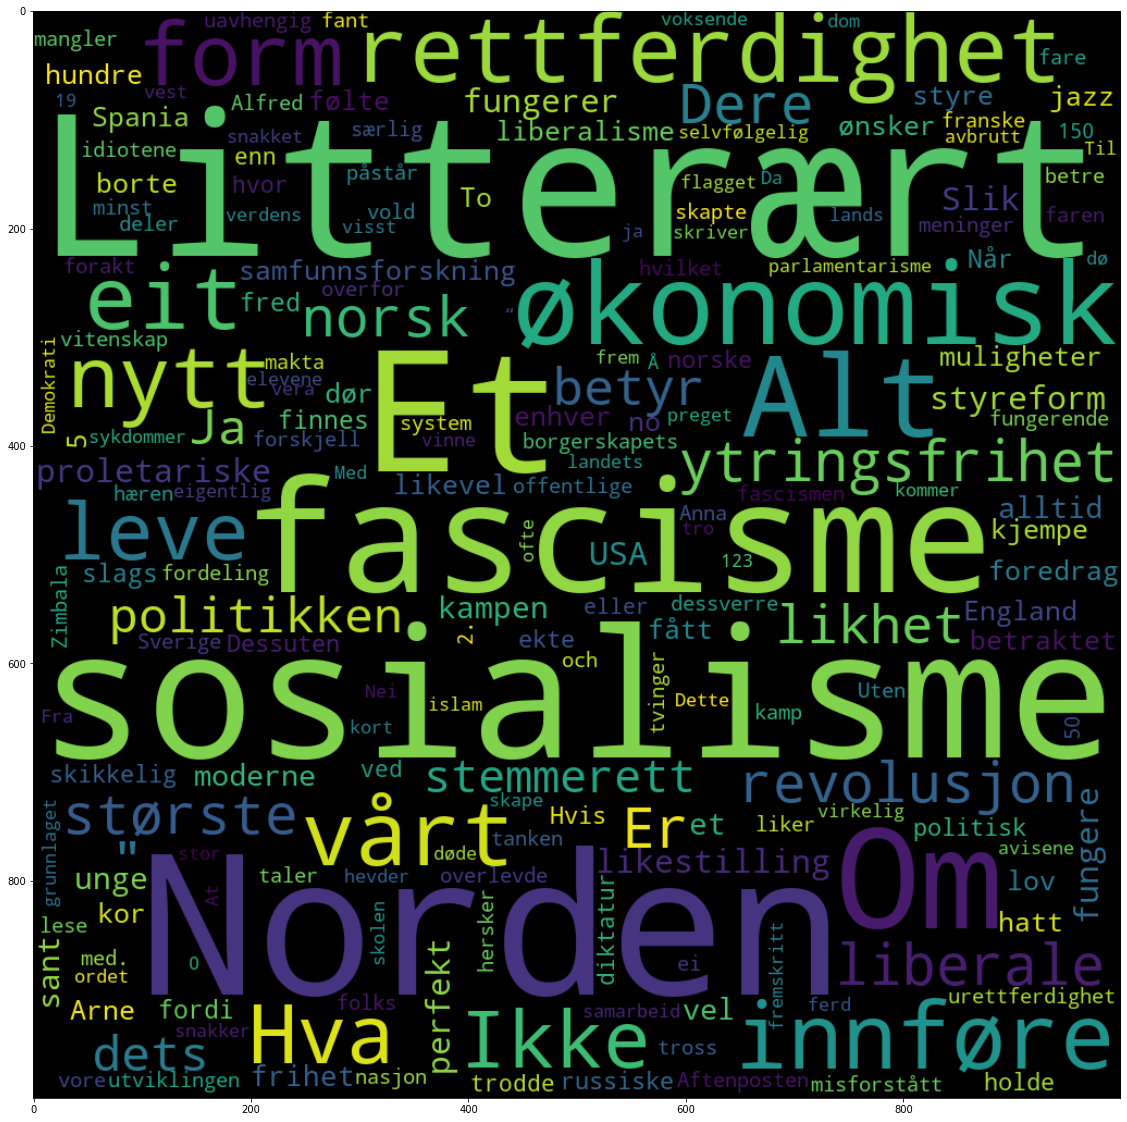

In [29]:
nb.cloud(nb.frame(delta_max.ratio))

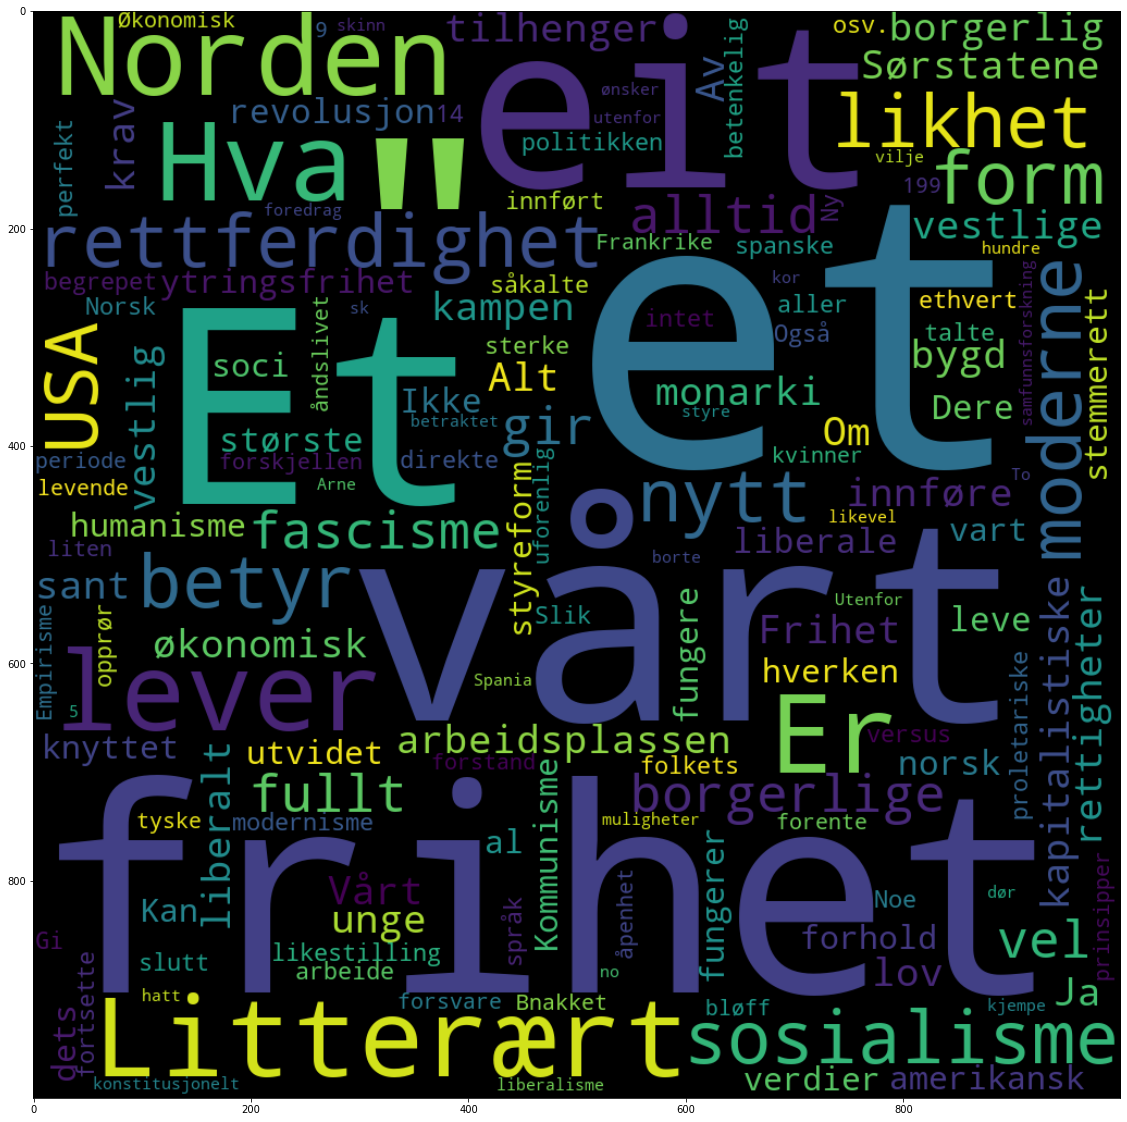

In [30]:
nb.cloud(nb.frame(delta_const.head(150).small/delta_const.small.sum()))